In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 1: Import the dataset 
def load_and_explore_data(file_path):
    """Load dataset and display basic information"""
    print("=" * 50)
    print("STEP 1: LOADING AND EXPLORING DATASET")
    print("=" * 50)
    
    # Load the dataset
    df = pd.read_csv(file_path)
    
    print(f"Dataset Shape: {df.shape}")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print("\n" + "=" * 30)
    print("DATASET INFO:")
    print("=" * 30)
    print(df.info())
    
    print("\n" + "=" * 30)
    print("FIRST 5 ROWS:")
    print("=" * 30)
    print(df.head())
    
    print("\n" + "=" * 30)
    print("DATASET DESCRIPTION:")
    print("=" * 30)
    print(df.describe())
    
    print("\n" + "=" * 30)
    print("NULL VALUES COUNT:")
    print("=" * 30)
    null_counts = df.isnull().sum()
    print(null_counts[null_counts > 0])
    
    print("\n" + "=" * 30)
    print("DATA TYPES:")
    print("=" * 30)
    print(df.dtypes)
    
    return df

In [3]:
# Step 2: Handle missing values
def handle_missing_values(df):
    """Handle missing values using mean/median/mode imputation"""
    print("\n" + "=" * 50)
    print("STEP 2: HANDLING MISSING VALUES")
    print("=" * 50)
    
    df_processed = df.copy()
    
    # Check for missing values
    missing_before = df_processed.isnull().sum()
    print("Missing values before handling:")
    print(missing_before[missing_before > 0])
    
    # Handle Age 
    if 'Age' in df_processed.columns and df_processed['Age'].isnull().sum() > 0:
        age_median = df_processed['Age'].median()
        df_processed['Age'].fillna(age_median, inplace=True)
        print(f"\nAge: Filled {missing_before['Age']} missing values with median: {age_median:.2f}")
    
    # Handle Embarked 
    if 'Embarked' in df_processed.columns and df_processed['Embarked'].isnull().sum() > 0:
        embarked_mode = df_processed['Embarked'].mode()[0]
        df_processed['Embarked'].fillna(embarked_mode, inplace=True)
        print(f"Embarked: Filled {missing_before['Embarked']} missing values with mode: {embarked_mode}")
    
    # Handle Cabin 
    if 'Cabin' in df_processed.columns:
        df_processed['Cabin_Missing'] = df_processed['Cabin'].isnull().astype(int)
        df_processed['Cabin'].fillna('Unknown', inplace=True)
        print(f"Cabin: Created indicator for missing values and filled with 'Unknown'")
    
    # Handle Fare 
    if 'Fare' in df_processed.columns and df_processed['Fare'].isnull().sum() > 0:
        fare_median = df_processed['Fare'].median()
        df_processed['Fare'].fillna(fare_median, inplace=True)
        print(f"Fare: Filled {missing_before['Fare']} missing values with median: {fare_median:.2f}")
    
    # Verify no missing values remain
    missing_after = df_processed.isnull().sum()
    print(f"\nMissing values after handling:")
    if missing_after.sum() == 0:
        print("✓ No missing values remaining!")
    else:
        print(missing_after[missing_after > 0])
    
    return df_processed

In [4]:
# Step 3: Convert categorical features to numerical using encoding
def encode_categorical_features(df):
    """Convert categorical features to numerical using various encoding techniques"""
    print("\n" + "=" * 50)
    print("STEP 3: ENCODING CATEGORICAL FEATURES")
    print("=" * 50)
    
    df_encoded = df.copy()
    
    # Identify categorical columns
    categorical_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()
    print(f"Categorical columns found: {categorical_cols}")
    
    # Sex: Binary encoding (0 for female, 1 for male)
    if 'Sex' in categorical_cols:
        df_encoded['Sex_Encoded'] = df_encoded['Sex'].map({'female': 0, 'male': 1})
        print(f"Sex: Encoded as binary (female=0, male=1)")
    
    # Embarked: One-hot encoding
    if 'Embarked' in categorical_cols:
        embarked_dummies = pd.get_dummies(df_encoded['Embarked'], prefix='Embarked')
        df_encoded = pd.concat([df_encoded, embarked_dummies], axis=1)
        print(f"Embarked: One-hot encoded into {embarked_dummies.columns.tolist()}")
    
    # Name: Extract titles and encode
    if 'Name' in categorical_cols:
        df_encoded['Title'] = df_encoded['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
        # Group rare titles
        title_mapping = {
            'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4,
            'Dr': 5, 'Rev': 6, 'Col': 7, 'Major': 7, 'Mlle': 2,
            'Countess': 8, 'Ms': 2, 'Lady': 8, 'Jonkheer': 8,
            'Don': 8, 'Dona': 8, 'Mme': 3, 'Capt': 7, 'Sir': 8
        }
        df_encoded['Title_Encoded'] = df_encoded['Title'].map(title_mapping).fillna(0)
        print("Name: Extracted and encoded titles")
    
    # Ticket: Create indicator for ticket prefixes
    if 'Ticket' in categorical_cols:
        df_encoded['Ticket_Prefix'] = df_encoded['Ticket'].str.extract('([A-Za-z]+)', expand=False)
        df_encoded['Ticket_Prefix'] = df_encoded['Ticket_Prefix'].fillna('None')
        df_encoded['Has_Ticket_Prefix'] = (df_encoded['Ticket_Prefix'] != 'None').astype(int)
        print("Ticket: Created ticket prefix indicators")
    
    # Cabin: Extract deck information
    if 'Cabin' in categorical_cols:
        df_encoded['Deck'] = df_encoded['Cabin'].str.extract('([A-Za-z])', expand=False)
        df_encoded['Deck'] = df_encoded['Deck'].fillna('Unknown')
        # Encode deck
        deck_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8, 'Unknown': 0}
        df_encoded['Deck_Encoded'] = df_encoded['Deck'].map(deck_mapping)
        print("Cabin: Extracted and encoded deck information")
    
    print(f"\nNew encoded features added: {len(df_encoded.columns) - len(df.columns)} features")
    
    return df_encoded

In [5]:
# Step 4: Normalize/standardize numerical features
def normalize_features(df):
    """Normalize/standardize numerical features"""
    print("\n" + "=" * 50)
    print("STEP 4: NORMALIZING/STANDARDIZING FEATURES")
    print("=" * 50)
    
    df_normalized = df.copy()
    
    # Identify numerical columns to normalize
    numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
    numerical_cols = [col for col in numerical_cols if col in df_normalized.columns]
    
    print(f"Numerical columns to normalize: {numerical_cols}")
    
    # Create scaler
    scaler = StandardScaler()
    
    # Store original values for comparison
    original_stats = {}
    for col in numerical_cols:
        original_stats[col] = {
            'mean': df_normalized[col].mean(),
            'std': df_normalized[col].std(),
            'min': df_normalized[col].min(),
            'max': df_normalized[col].max()
        }
    
    # Normalize the features
    df_normalized[numerical_cols] = scaler.fit_transform(df_normalized[numerical_cols])
    
    print("\nNormalization Results:")
    print("-" * 40)
    for col in numerical_cols:
        print(f"{col}:")
        print(f"  Original - Mean: {original_stats[col]['mean']:.2f}, Std: {original_stats[col]['std']:.2f}")
        print(f"  Original - Min: {original_stats[col]['min']:.2f}, Max: {original_stats[col]['max']:.2f}")
        print(f"  Normalized - Mean: {df_normalized[col].mean():.2f}, Std: {df_normalized[col].std():.2f}")
        print(f"  Normalized - Min: {df_normalized[col].min():.2f}, Max: {df_normalized[col].max():.2f}")
        print()
    
    return df_normalized, scaler


In [6]:
# Step 5: Visualize and remove outliers
def visualize_and_remove_outliers(df):
    """Visualize outliers using boxplots and remove them"""
    print("\n" + "=" * 50)
    print("STEP 5: VISUALIZING AND REMOVING OUTLIERS")
    print("=" * 50)
    
    df_cleaned = df.copy()
    
    # Numerical columns to check for outliers (before normalization)
    original_numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
    
    # First, let's work with original data for outlier detection
    df_original = df.copy()
    
    # Create figure for boxplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Boxplots for Outlier Detection (Before Removal)', fontsize=16)
    
    outlier_info = {}
    
    for i, col in enumerate(original_numerical_cols):
        if col in df_original.columns:
            ax = axes[i//2, i%2]
            
            # Create boxplot
            bp = ax.boxplot(df_original[col].dropna(), patch_artist=True)
            ax.set_title(f'{col} - Boxplot')
            ax.set_ylabel(col)
            
            # Calculate IQR and outlier bounds
            Q1 = df_original[col].quantile(0.25)
            Q3 = df_original[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Count outliers
            outliers = df_original[(df_original[col] < lower_bound) | (df_original[col] > upper_bound)][col]
            outlier_info[col] = {
                'count': len(outliers),
                'lower_bound': lower_bound,
                'upper_bound': upper_bound,
                'outlier_values': outliers.tolist()[:10]  # Show first 10 outliers
            }
            
            # Add outlier information to plot
            ax.text(0.02, 0.98, f'Outliers: {len(outliers)}', transform=ax.transAxes, 
                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    # Print outlier information
    print("Outlier Analysis:")
    print("-" * 40)
    total_outliers_before = 0
    for col, info in outlier_info.items():
        print(f"{col}:")
        print(f"  Outliers found: {info['count']}")
        print(f"  Lower bound: {info['lower_bound']:.2f}")
        print(f"  Upper bound: {info['upper_bound']:.2f}")
        if info['outlier_values']:
            print(f"  Sample outlier values: {info['outlier_values']}")
        total_outliers_before += info['count']
        print()
    
    # Remove outliers (using IQR method)
    print(f"Total outlier data points before removal: {total_outliers_before}")
    
    rows_before = len(df_cleaned)
    
    # Remove outliers for each numerical column
    for col in original_numerical_cols:
        if col in df_cleaned.columns:
            Q1 = df_original[col].quantile(0.25)
            Q3 = df_original[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Keep only rows within bounds
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    
    rows_after = len(df_cleaned)
    print(f"Rows before outlier removal: {rows_before}")
    print(f"Rows after outlier removal: {rows_after}")
    print(f"Rows removed: {rows_before - rows_after} ({((rows_before - rows_after)/rows_before)*100:.1f}%)")
    
    # Create boxplots after outlier removal
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Boxplots After Outlier Removal', fontsize=16)
    
    for i, col in enumerate(original_numerical_cols):
        if col in df_cleaned.columns:
            ax = axes[i//2, i%2]
            bp = ax.boxplot(df_cleaned[col].dropna(), patch_artist=True)
            ax.set_title(f'{col} - After Outlier Removal')
            ax.set_ylabel(col)
    
    plt.tight_layout()
    plt.show()
    
    return df_cleaned


In [7]:
# Main execution

def preprocess_titanic_data(file_path):
    
    print("\nTITANIC DATASET PREPROCESSING PIPELINE")
    
    
    # Step 1: Load and explore data
    df = load_and_explore_data(file_path)
    
    # Step 2: Handle missing values
    df = handle_missing_values(df)
    
    # Step 3: Encode categorical features
    df = encode_categorical_features(df)
    
    # Step 5: Remove outliers (before normalization to see actual values)
    df = visualize_and_remove_outliers(df)
    
    # Step 4: Normalize features (after outlier removal)
    df, scaler = normalize_features(df)
    
    
    print("\nPREPROCESSING COMPLETED")
    
    print(f"Final dataset shape: {df.shape}")
    print(f"Final columns: {df.columns.tolist()}")
    
    # Display final processed data sample
    
    print("\nFINAL PROCESSED DATA (First 5 rows):")
    
    print(df.head())
    
    return df, scaler



TITANIC DATASET PREPROCESSING PIPELINE
STEP 1: LOADING AND EXPLORING DATASET
Dataset Shape: (891, 12)
Number of rows: 891
Number of columns: 12

DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

FIRST 5 ROWS:
   PassengerId  Survived  Pclass  \
0            1         0    

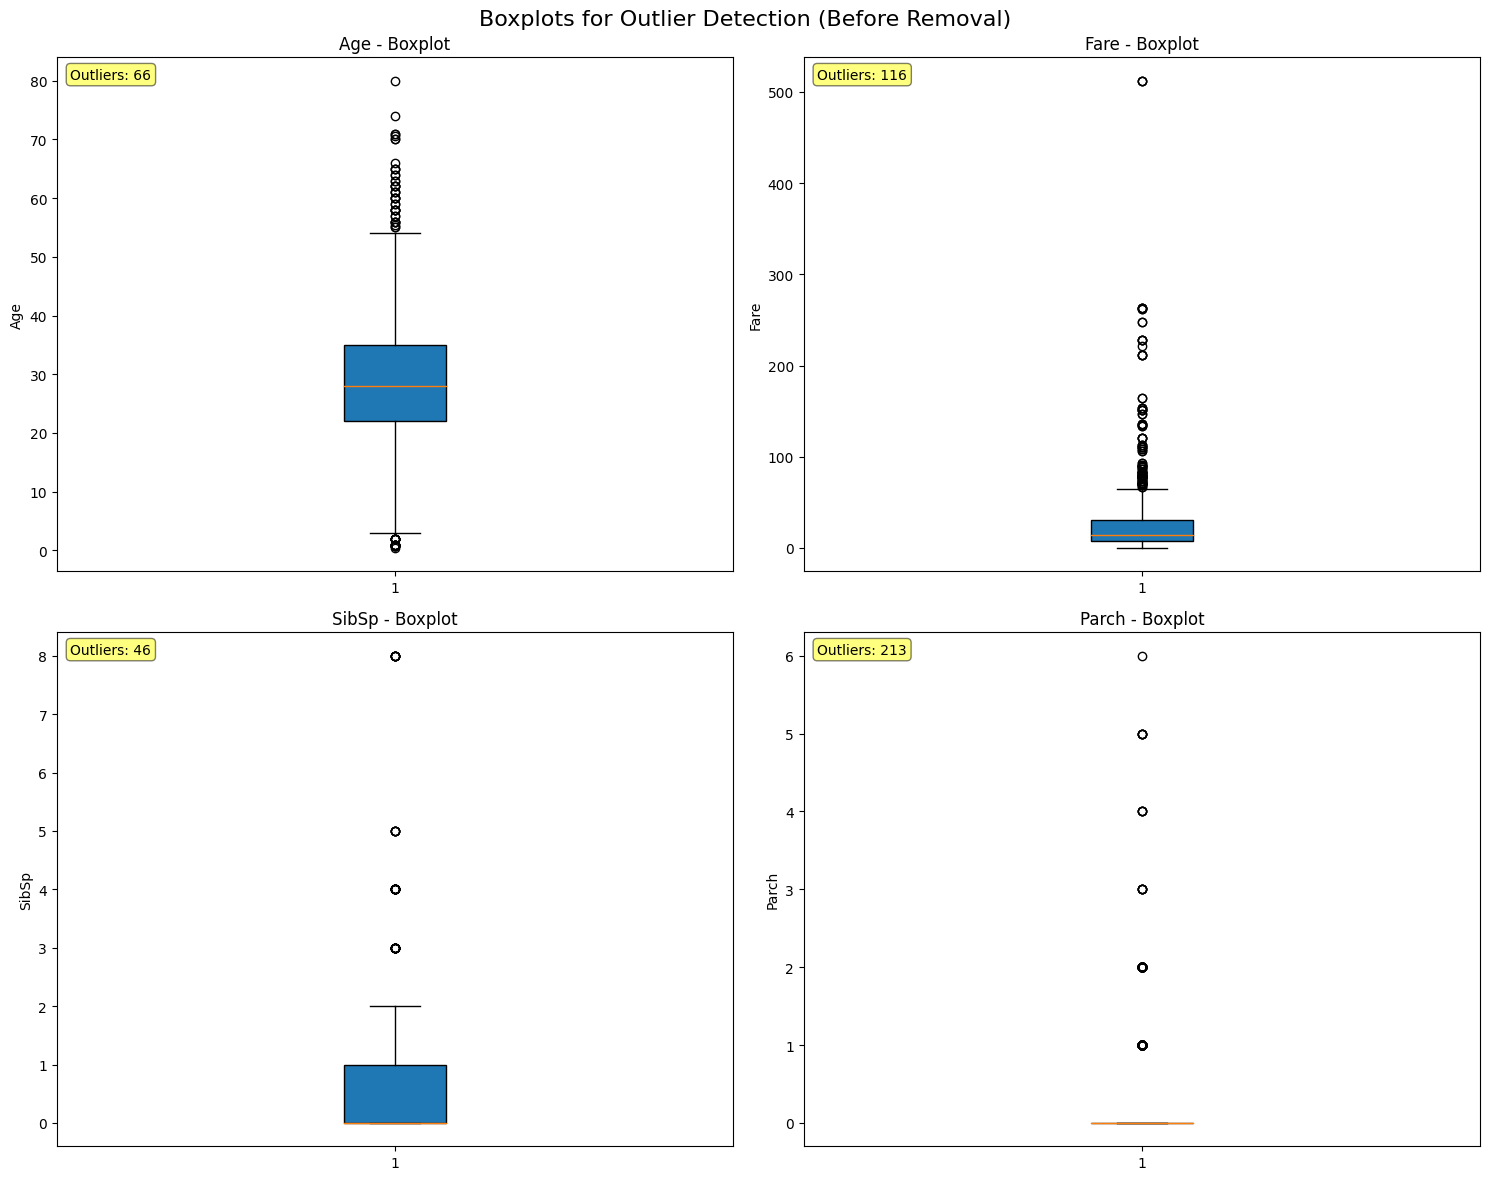

Outlier Analysis:
----------------------------------------
Age:
  Outliers found: 66
  Lower bound: 2.50
  Upper bound: 54.50
  Sample outlier values: [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5]

Fare:
  Outliers found: 116
  Lower bound: -26.72
  Upper bound: 65.63
  Sample outlier values: [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875]

SibSp:
  Outliers found: 46
  Lower bound: -1.50
  Upper bound: 2.50
  Sample outlier values: [3, 4, 3, 3, 4, 5, 3, 4, 5, 3]

Parch:
  Outliers found: 213
  Lower bound: 0.00
  Upper bound: 0.00
  Sample outlier values: [1, 2, 1, 5, 1, 1, 5, 2, 2, 1]

Total outlier data points before removal: 441
Rows before outlier removal: 891
Rows after outlier removal: 577
Rows removed: 314 (35.2%)


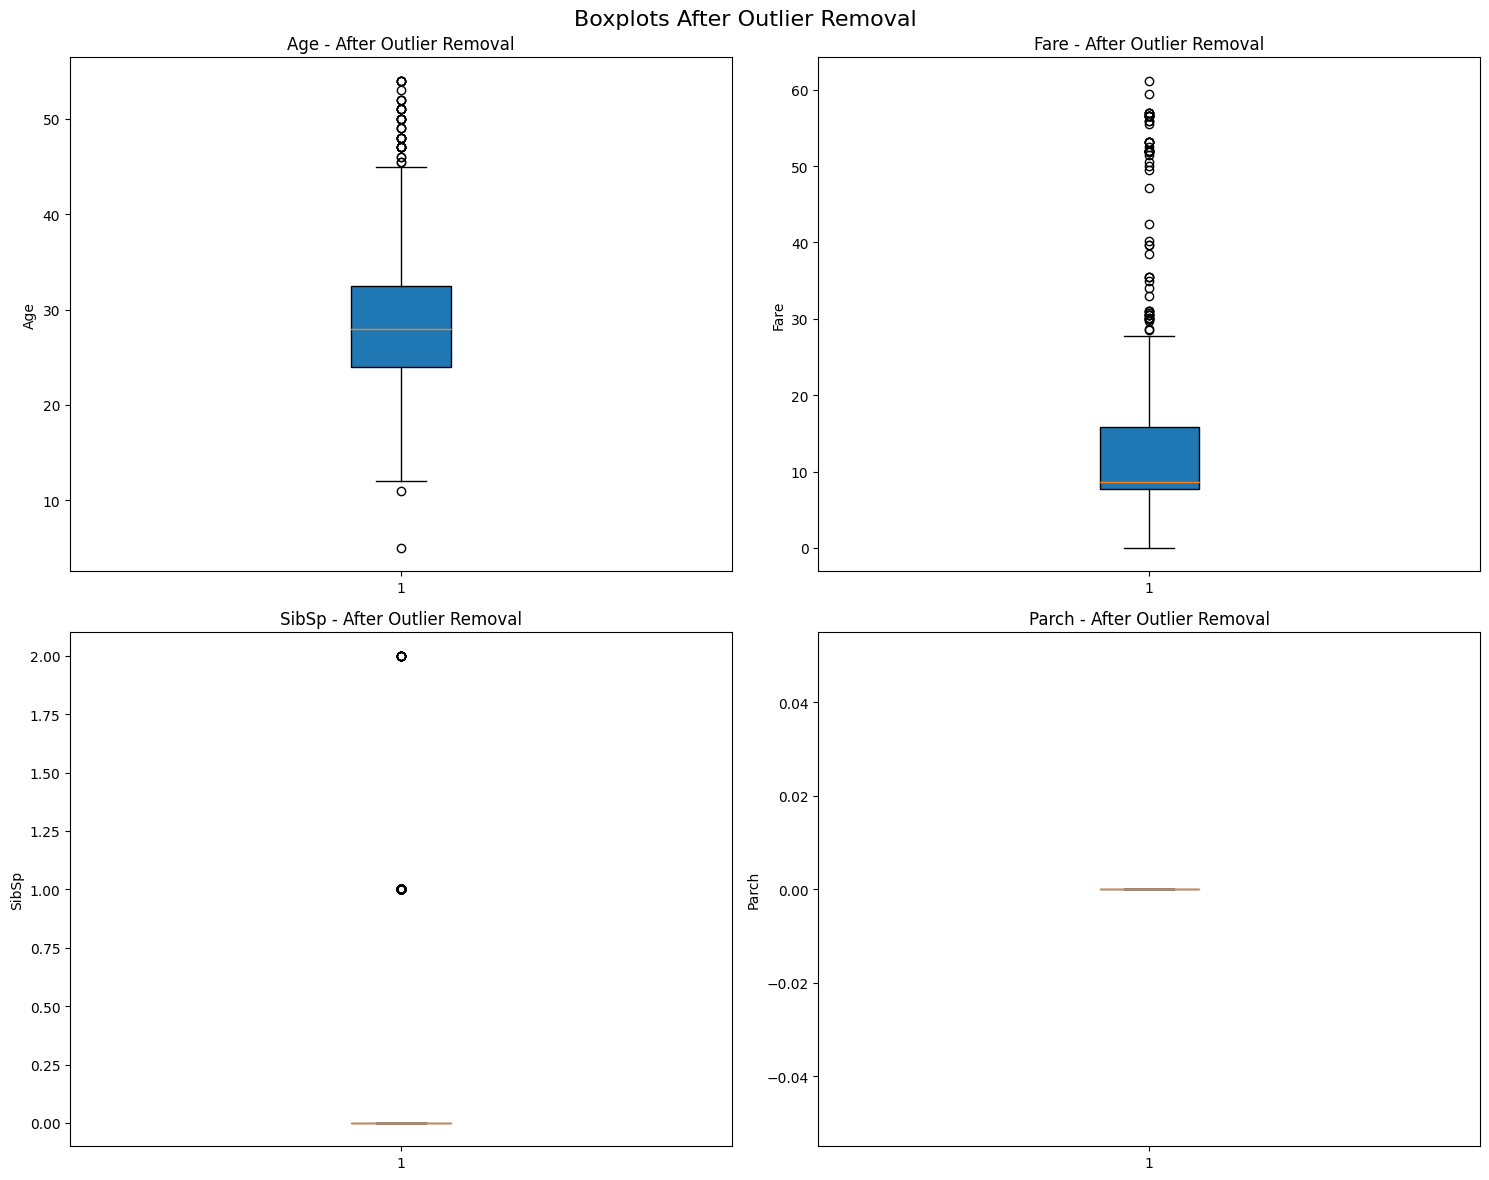


STEP 4: NORMALIZING/STANDARDIZING FEATURES
Numerical columns to normalize: ['Age', 'Fare', 'SibSp', 'Parch']

Normalization Results:
----------------------------------------
Age:
  Original - Mean: 29.30, Std: 8.55
  Original - Min: 5.00, Max: 54.00
  Normalized - Mean: 0.00, Std: 1.00
  Normalized - Min: -2.84, Max: 2.89

Fare:
  Original - Mean: 14.93, Std: 12.61
  Original - Min: 0.00, Max: 61.17
  Normalized - Mean: 0.00, Std: 1.00
  Normalized - Min: -1.19, Max: 3.67

SibSp:
  Original - Mean: 0.20, Std: 0.45
  Original - Min: 0.00, Max: 2.00
  Normalized - Mean: -0.00, Std: 1.00
  Normalized - Min: -0.45, Max: 4.05

Parch:
  Original - Mean: 0.00, Std: 0.00
  Original - Min: 0.00, Max: 0.00
  Normalized - Mean: 0.00, Std: 0.00
  Normalized - Min: 0.00, Max: 0.00


PREPROCESSING COMPLETED
Final dataset shape: (577, 23)
Final columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_Missing', 'Sex_Encoded',

In [8]:
# Usage example:
if __name__ == "__main__":
    # Replace with your file path
    file_path = "/kaggle/input/elevate-lab-task-1/Titanic-Dataset.csv"
    
    # Run the complete preprocessing pipeline
    processed_df, scaler = preprocess_titanic_data(file_path)
    
    # Save the processed dataset
    processed_df.to_csv('titanic_processed.csv', index=False)
    print("\n Processed dataset saved as 'titanic_processed.csv'")
    
    # Optional: Create a summary report
    
    print("\n FINAL SUMMARY REPORT")
    
    
    # Feature summary
    numerical_features = processed_df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = processed_df.select_dtypes(include=['object']).columns.tolist()
    
    print(f"Total features: {len(processed_df.columns)}")
    print(f"Numerical features: {len(numerical_features)}")
    print(f"Categorical features: {len(categorical_features)}")
    print(f"Missing values: {processed_df.isnull().sum().sum()}")
    
    print("\nPreprocessing pipeline completed successfully")

TASK 2: EXPLORATORY DATA ANALYSIS (EDA)

1. SUMMARY STATISTICS
Dataset Shape: (577, 23)
Memory Usage: 329.00 KB

Numerical columns (12): ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_Missing', 'Sex_Encoded', 'Title_Encoded', 'Has_Ticket_Prefix', 'Deck_Encoded']

Summary Statistics for Numerical Features:
       PassengerId  Survived   Pclass      Age    SibSp  Parch     Fare  \
count      577.000   577.000  577.000  577.000  577.000  577.0  577.000   
mean       450.591     0.300    2.503    0.000   -0.000    0.0    0.000   
std        259.568     0.459    0.734    1.001    1.001    0.0    1.001   
min          1.000     0.000    1.000   -2.844   -0.448    0.0   -1.185   
25%        222.000     0.000    2.000   -0.621   -0.448    0.0   -0.568   
50%        455.000     0.000    3.000   -0.153   -0.448    0.0   -0.497   
75%        676.000     1.000    3.000    0.374   -0.448    0.0    0.073   
max        891.000     1.000    3.000    2.890    4.050    0.0

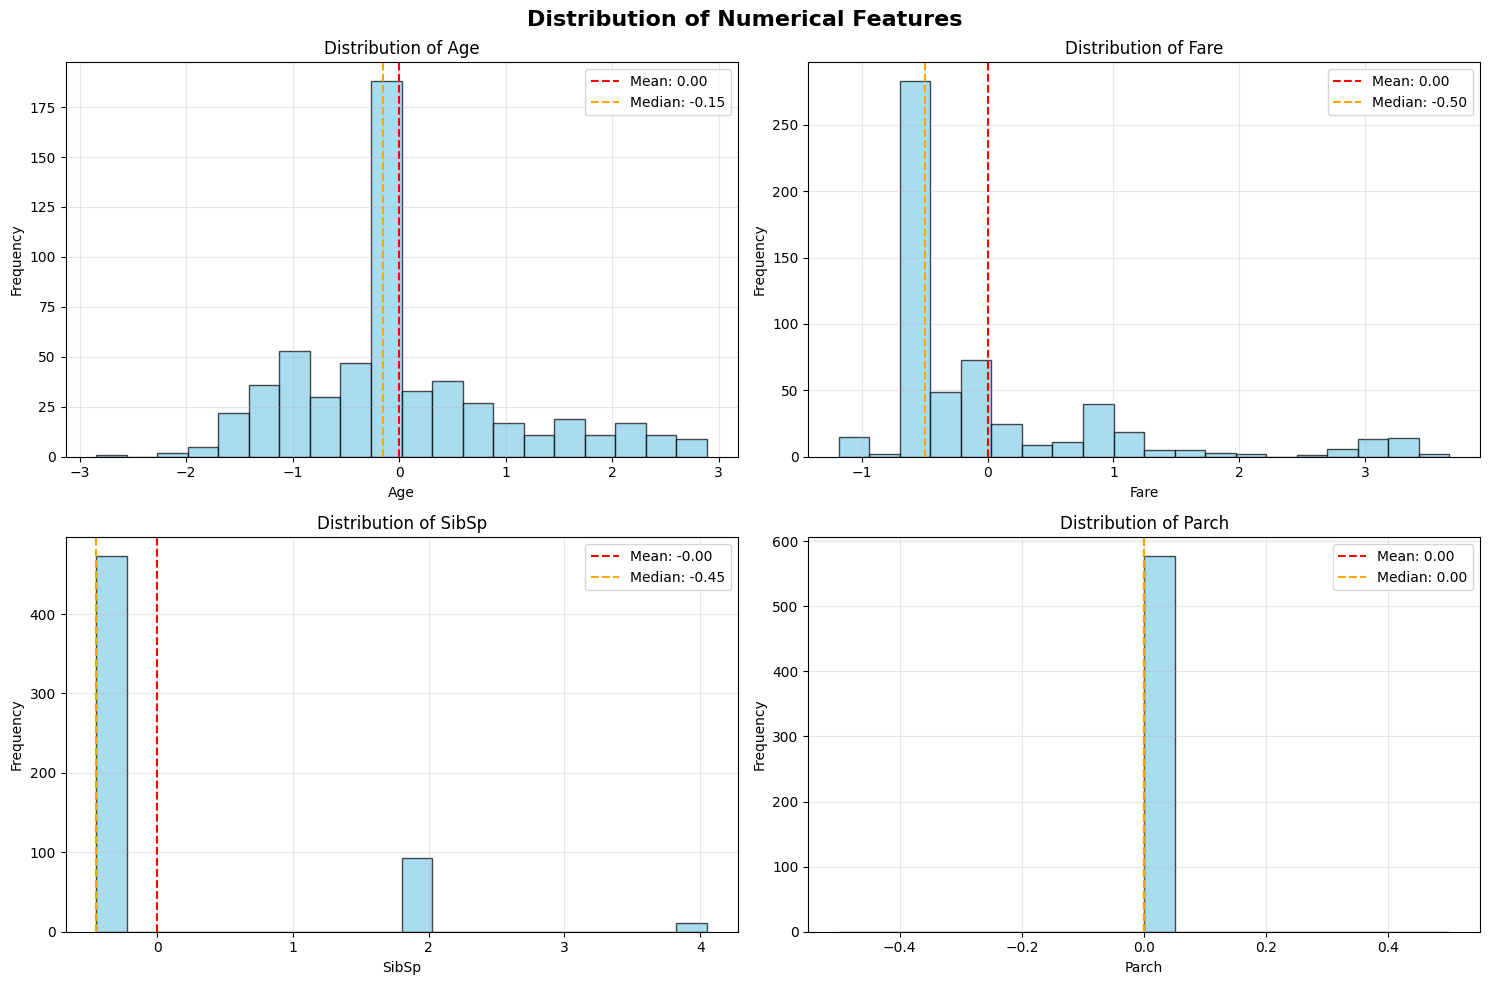


3. FEATURE RELATIONSHIPS AND CORRELATIONS


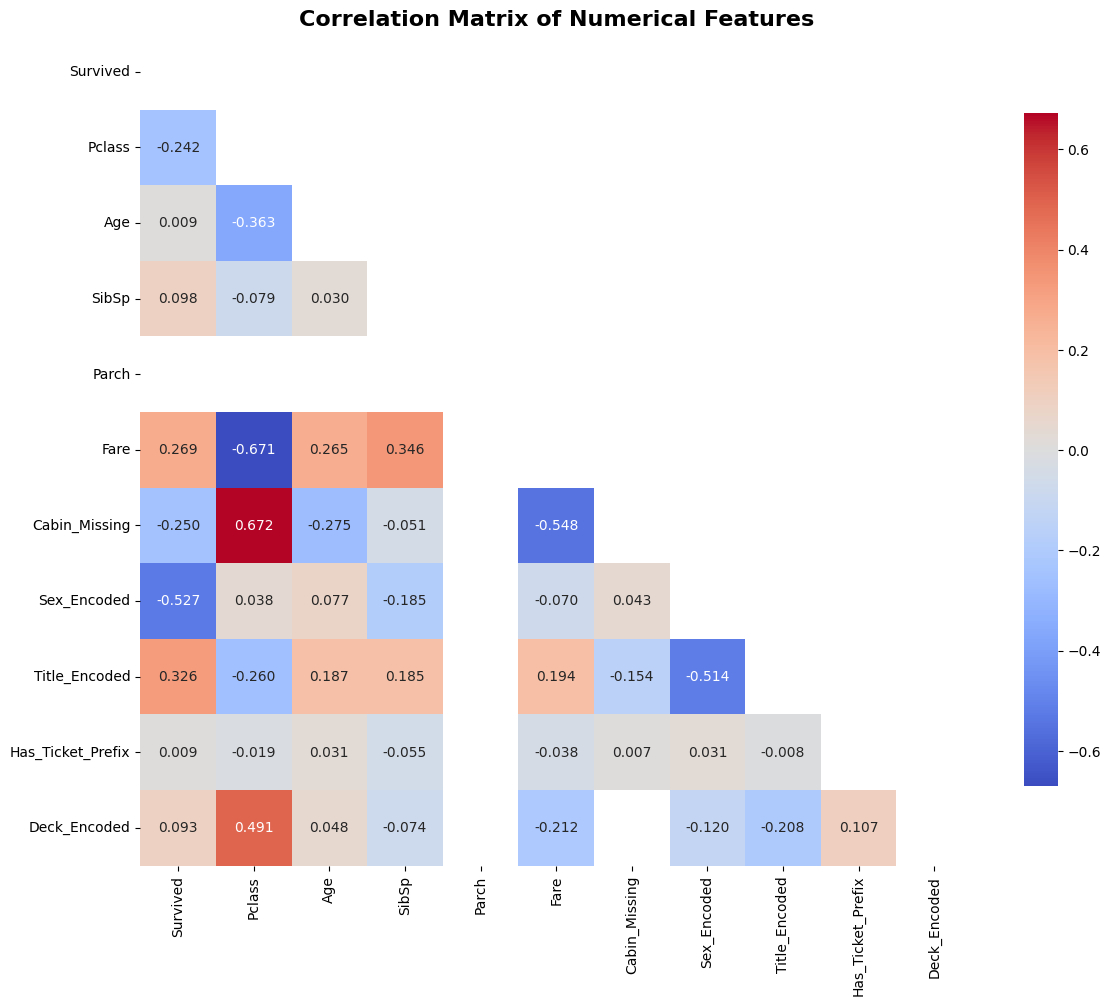


Strong Correlations (|r| > 0.5):
Survived vs Sex_Encoded: -0.527
Pclass vs Fare: -0.671
Pclass vs Cabin_Missing: 0.672
Fare vs Cabin_Missing: -0.548
Sex_Encoded vs Title_Encoded: -0.514

Creating pairplot for features: ['Age', 'Fare', 'Survived', 'Pclass']


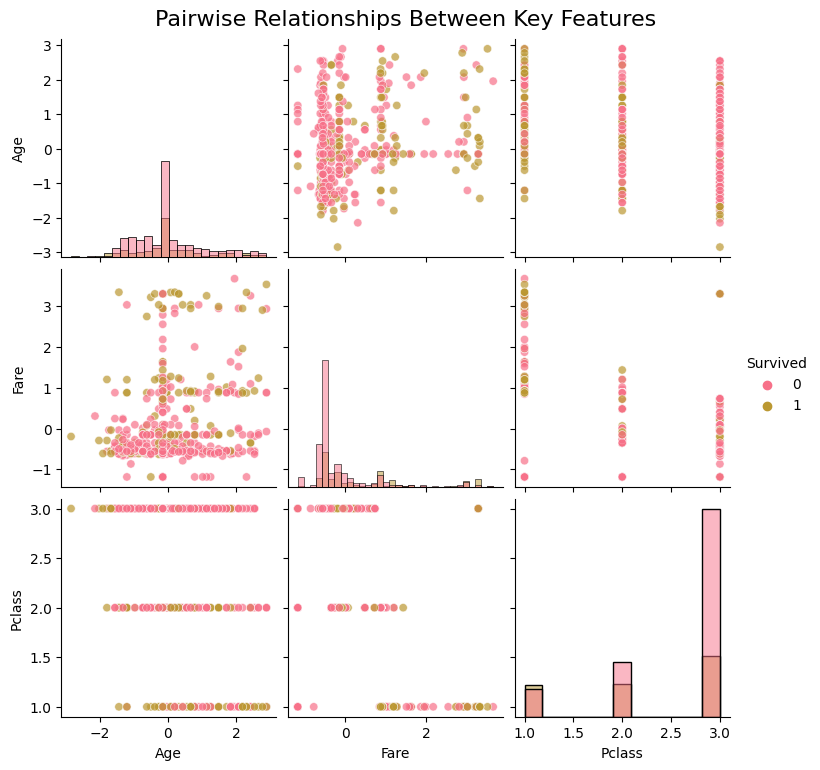


4. PATTERNS, TRENDS, AND ANOMALIES
SURVIVAL ANALYSIS:
------------------------------

Survival by Passenger Class:
        Count  Survival_Rate
Pclass                      
1          83          0.530
2         121          0.372
3         373          0.225

Survival by Gender:
        Count  Survival_Rate
Sex                         
female    143          0.720
male      434          0.161

Survival by Age Group:
                     Count  Survival_Rate
Age_Group                                
Child (0-18)           193          0.321
Young Adult (18-35)      0            NaN
Adult (35-60)            0            NaN
Senior (60+)             0            NaN

Survival by Fare Category:
               Count  Survival_Rate
Fare_Category                      
Low              422          0.235
Medium-Low       104          0.442
Medium-High       15          0.400
High              36          0.611


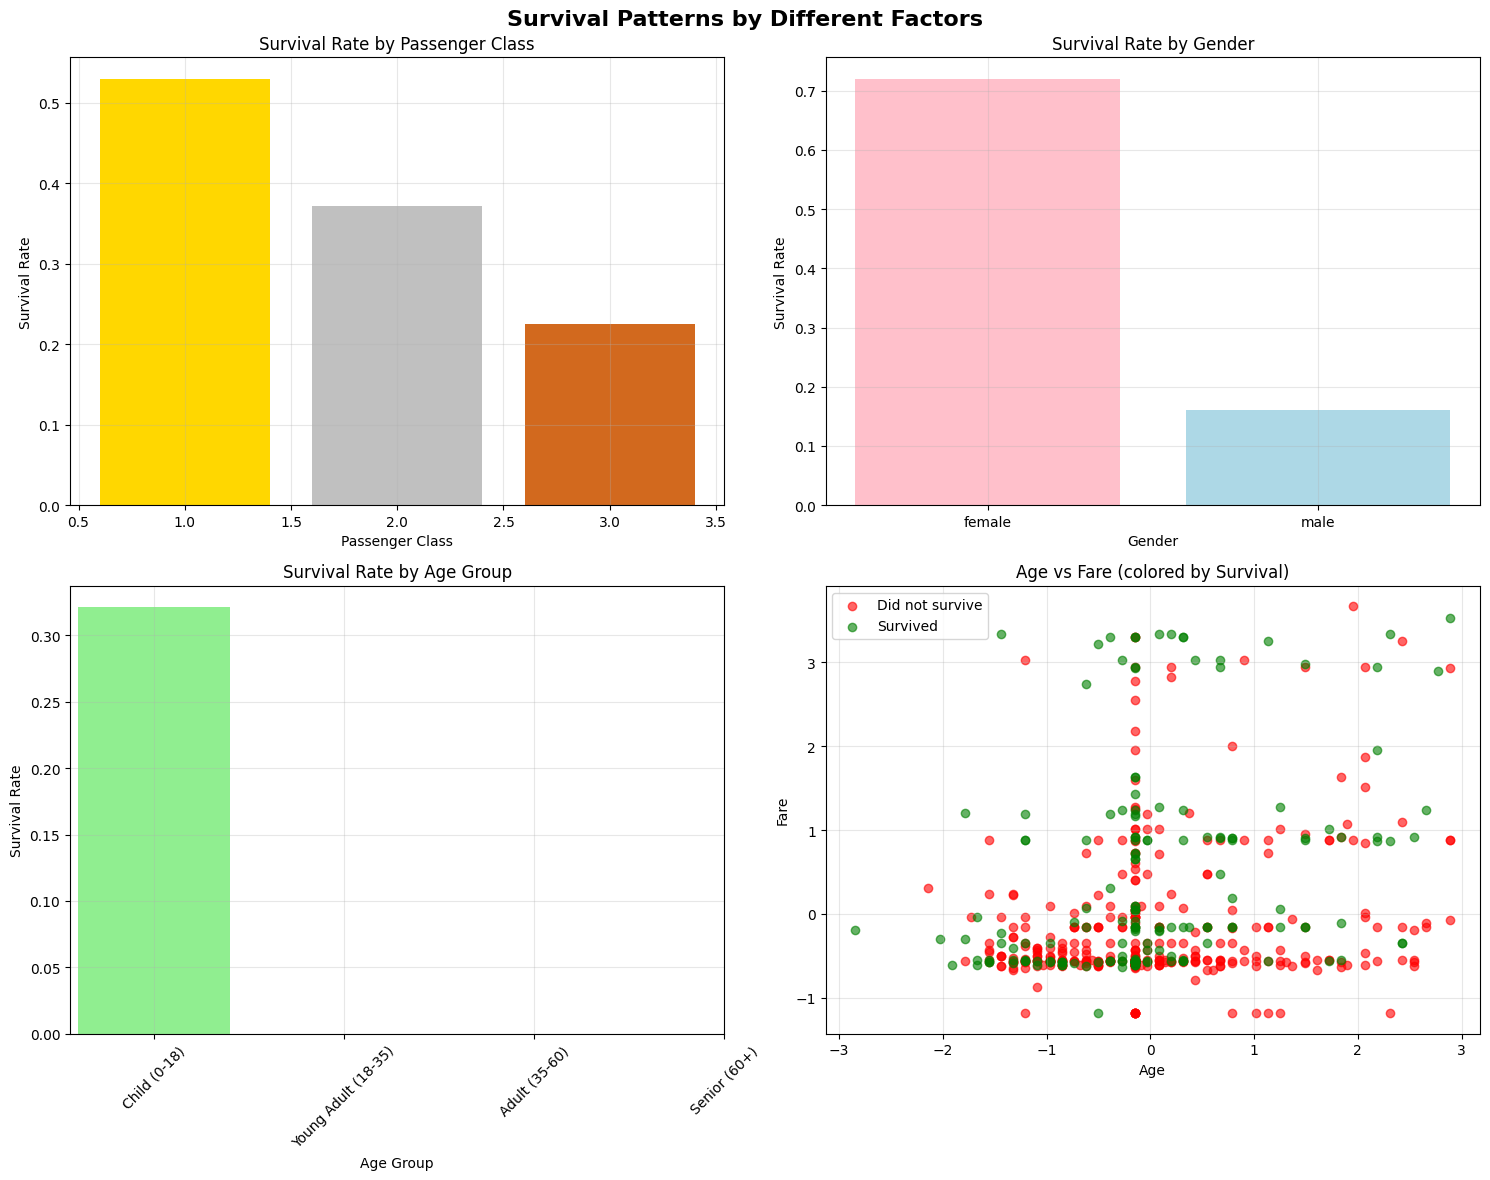


5. KEY INSIGHTS AND INFERENCES

KEY INSIGHTS:
• Passenger class significantly impacts survival: Class 1 has the highest survival rate (0.53), while Class 3 has the lowest (0.23)
• Gender shows strong survival bias: Females have 0.72 survival rate vs Males 0.16
• Age affects survival chances: Child (0-18) group has the highest survival rate (0.32)
• Higher fares correlate with better survival: Above-median fare passengers have 0.40 vs 0.20 survival rate
• Family size impact: Small families (2-4 members) tend to have better survival rates than solo travelers or very large families
• Data quality: 499 missing values in 'Deck_Encoded' (86.5% of data)
• Notable correlations found between features, suggesting potential multicollinearity to consider in modeling

FEATURE IMPORTANCE SUGGESTIONS FOR MODELING:
--------------------------------------------------
• High importance: Passenger Class, Gender
• Medium importance: Age, Fare, Family Size
• Low importance: Ticket information, Cabin detail

In [10]:
# Task 2: Exploratory Data Analysis (EDA)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

# Load the processed dataset
df = pd.read_csv('titanic_processed.csv')

print("="*60)
print("TASK 2: EXPLORATORY DATA ANALYSIS (EDA)")
print("="*60)


print("\n1. SUMMARY STATISTICS")

# Basic dataset information
print(f"Dataset Shape: {df.shape}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Summary statistics for numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols}")

print("\nSummary Statistics for Numerical Features:")
print(df[numerical_cols].describe().round(3))

# Summary statistics for categorical features
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")

print("\nSummary Statistics for Categorical Features:")
for col in categorical_cols:
    if df[col].nunique() < 10:  # Only show for columns with few unique values
        print(f"\n{col}:")
        print(df[col].value_counts())

# Survival rate analysis
survival_rate = df['Survived'].mean()
print(f"\nOverall Survival Rate: {survival_rate:.3f} ({survival_rate*100:.1f}%)")


print("\n2. DISTRIBUTIONS OF NUMERICAL FEATURES")


# Select key numerical features for visualization
key_numerical = ['Age', 'Fare', 'SibSp', 'Parch']
available_numerical = [col for col in key_numerical if col in df.columns]

# Create histograms
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')

for i, col in enumerate(available_numerical):
    row = i // 2
    col_idx = i % 2
    
    # Histogram
    axes[row, col_idx].hist(df[col].dropna(), bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')
    axes[row, col_idx].grid(True, alpha=0.3)
    
    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[row, col_idx].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[row, col_idx].axvline(median_val, color='orange', linestyle='--', label=f'Median: {median_val:.2f}')
    axes[row, col_idx].legend()

plt.tight_layout()
plt.show()


print("\n3. FEATURE RELATIONSHIPS AND CORRELATIONS")


# Correlation matrix for numerical features
numerical_for_corr = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove ID columns and focus on meaningful features
numerical_for_corr = [col for col in numerical_for_corr if col not in ['PassengerId']]

correlation_matrix = df[numerical_for_corr].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8}, mask=mask)
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print strong correlations
print("\nStrong Correlations (|r| > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            print(f"{correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}: {corr_val:.3f}")

# Pairplot for key features
key_features_for_pairs = ['Age', 'Fare', 'Survived', 'Pclass']
available_pairs = [col for col in key_features_for_pairs if col in df.columns]

if len(available_pairs) >= 3:
    print(f"\nCreating pairplot for features: {available_pairs}")
    pairplot_data = df[available_pairs].copy()
    
    # Create pairplot
    g = sns.pairplot(pairplot_data, hue='Survived' if 'Survived' in available_pairs else None, 
                     diag_kind='hist', plot_kws={'alpha': 0.7})
    g.fig.suptitle('Pairwise Relationships Between Key Features', y=1.02, fontsize=16)
    plt.show()


print("\n4. PATTERNS, TRENDS, AND ANOMALIES")


# Survival analysis by different factors
print("SURVIVAL ANALYSIS:")
print("-" * 30)

# Survival by Passenger Class
if 'Pclass' in df.columns:
    pclass_survival = df.groupby('Pclass')['Survived'].agg(['count', 'mean']).round(3)
    pclass_survival.columns = ['Count', 'Survival_Rate']
    print("\nSurvival by Passenger Class:")
    print(pclass_survival)

# Survival by Gender
if 'Sex' in df.columns:
    gender_survival = df.groupby('Sex')['Survived'].agg(['count', 'mean']).round(3)
    gender_survival.columns = ['Count', 'Survival_Rate']
    print("\nSurvival by Gender:")
    print(gender_survival)

# Survival by Age groups
if 'Age' in df.columns:
    df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 60, 100], 
                            labels=['Child (0-18)', 'Young Adult (18-35)', 
                                   'Adult (35-60)', 'Senior (60+)'])
    age_survival = df.groupby('Age_Group')['Survived'].agg(['count', 'mean']).round(3)
    age_survival.columns = ['Count', 'Survival_Rate']
    print("\nSurvival by Age Group:")
    print(age_survival)

# Survival by Fare categories
if 'Fare' in df.columns:
    df['Fare_Category'] = pd.cut(df['Fare'], bins=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
    fare_survival = df.groupby('Fare_Category')['Survived'].agg(['count', 'mean']).round(3)
    fare_survival.columns = ['Count', 'Survival_Rate']
    print("\nSurvival by Fare Category:")
    print(fare_survival)

# Create visualization for survival patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Survival Patterns by Different Factors', fontsize=16, fontweight='bold')

# 1. Survival by Passenger Class
if 'Pclass' in df.columns:
    pclass_data = df.groupby('Pclass')['Survived'].mean()
    axes[0, 0].bar(pclass_data.index, pclass_data.values, color=['gold', 'silver', 'chocolate'])
    axes[0, 0].set_title('Survival Rate by Passenger Class')
    axes[0, 0].set_xlabel('Passenger Class')
    axes[0, 0].set_ylabel('Survival Rate')
    axes[0, 0].grid(True, alpha=0.3)

# 2. Survival by Gender
if 'Sex' in df.columns:
    gender_data = df.groupby('Sex')['Survived'].mean()
    axes[0, 1].bar(gender_data.index, gender_data.values, color=['pink', 'lightblue'])
    axes[0, 1].set_title('Survival Rate by Gender')
    axes[0, 1].set_xlabel('Gender')
    axes[0, 1].set_ylabel('Survival Rate')
    axes[0, 1].grid(True, alpha=0.3)

# 3. Survival by Age Group
if 'Age_Group' in df.columns:
    age_data = df.groupby('Age_Group')['Survived'].mean()
    axes[1, 0].bar(range(len(age_data)), age_data.values, color='lightgreen')
    axes[1, 0].set_title('Survival Rate by Age Group')
    axes[1, 0].set_xlabel('Age Group')
    axes[1, 0].set_ylabel('Survival Rate')
    axes[1, 0].set_xticks(range(len(age_data)))
    axes[1, 0].set_xticklabels(age_data.index, rotation=45)
    axes[1, 0].grid(True, alpha=0.3)

# 4. Age vs Fare scatter plot with survival
if 'Age' in df.columns and 'Fare' in df.columns:
    survived = df[df['Survived'] == 1]
    died = df[df['Survived'] == 0]
    
    axes[1, 1].scatter(died['Age'], died['Fare'], alpha=0.6, c='red', label='Did not survive')
    axes[1, 1].scatter(survived['Age'], survived['Fare'], alpha=0.6, c='green', label='Survived')
    axes[1, 1].set_title('Age vs Fare (colored by Survival)')
    axes[1, 1].set_xlabel('Age')
    axes[1, 1].set_ylabel('Fare')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


print("\n5. KEY INSIGHTS AND INFERENCES")


insights = []

# Class-based insights
if 'Pclass' in df.columns:
    pclass_survival_rates = df.groupby('Pclass')['Survived'].mean()
    best_class = pclass_survival_rates.idxmax()
    worst_class = pclass_survival_rates.idxmin()
    insights.append(f"• Passenger class significantly impacts survival: Class {best_class} has the highest survival rate ({pclass_survival_rates[best_class]:.2f}), while Class {worst_class} has the lowest ({pclass_survival_rates[worst_class]:.2f})")

# Gender-based insights
if 'Sex' in df.columns:
    gender_survival_rates = df.groupby('Sex')['Survived'].mean()
    if len(gender_survival_rates) == 2:
        female_rate = gender_survival_rates.get('female', 0)
        male_rate = gender_survival_rates.get('male', 0)
        insights.append(f"• Gender shows strong survival bias: Females have {female_rate:.2f} survival rate vs Males {male_rate:.2f}")

# Age-based insights
if 'Age' in df.columns and 'Age_Group' in df.columns:
    age_survival_rates = df.groupby('Age_Group')['Survived'].mean()
    if not age_survival_rates.empty:
        best_age_group = age_survival_rates.idxmax()
        insights.append(f"• Age affects survival chances: {best_age_group} group has the highest survival rate ({age_survival_rates[best_age_group]:.2f})")

# Fare-based insights
if 'Fare' in df.columns:
    high_fare_survival = df[df['Fare'] > df['Fare'].median()]['Survived'].mean()
    low_fare_survival = df[df['Fare'] <= df['Fare'].median()]['Survived'].mean()
    insights.append(f"• Higher fares correlate with better survival: Above-median fare passengers have {high_fare_survival:.2f} vs {low_fare_survival:.2f} survival rate")

# Family size insights
if 'SibSp' in df.columns and 'Parch' in df.columns:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    family_survival = df.groupby('FamilySize')['Survived'].mean()
    insights.append(f"• Family size impact: Small families (2-4 members) tend to have better survival rates than solo travelers or very large families")

# Missing data insights
missing_counts = df.isnull().sum()
if missing_counts.sum() > 0:
    most_missing = missing_counts.idxmax()
    insights.append(f"• Data quality: {missing_counts[most_missing]} missing values in '{most_missing}' ({missing_counts[most_missing]/len(df)*100:.1f}% of data)")

# Correlation insights
if len(numerical_for_corr) > 1:
    strong_correlations = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.3:
                strong_correlations.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))
    
    if strong_correlations:
        insights.append(f"• Notable correlations found between features, suggesting potential multicollinearity to consider in modeling")

print("\nKEY INSIGHTS:")

for insight in insights:
    print(insight)

# Feature importance suggestions for modeling
print("\nFEATURE IMPORTANCE SUGGESTIONS FOR MODELING:")
print("-" * 50)
print("• High importance: Passenger Class, Gender")
print("• Medium importance: Age, Fare, Family Size")
print("• Low importance: Ticket information, Cabin details (due to missing values)")
print("• Consider feature engineering: Family size, Title extraction, Fare categories")


print("EXPLORATORY DATA ANALYSIS COMPLETED")

print(f"• Dataset contains {len(df)} samples with {len(df.columns)} features")
print(f"• Overall survival rate: {df['Survived'].mean():.3f}")
print(f"• Key patterns identified for passenger class, gender, and age")
print(f"• Ready for feature engineering and model building")